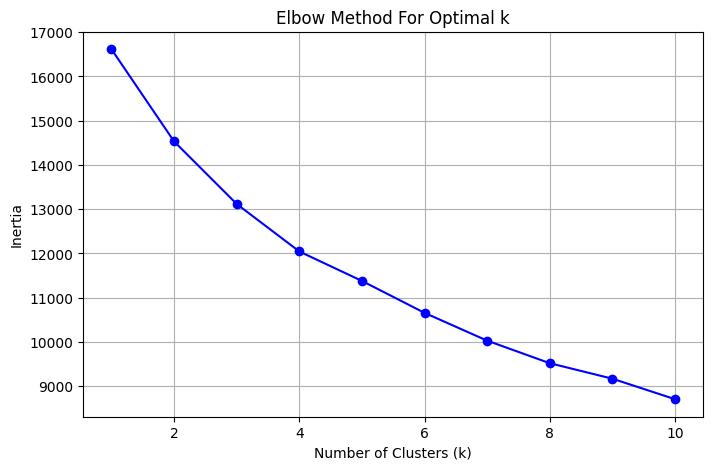

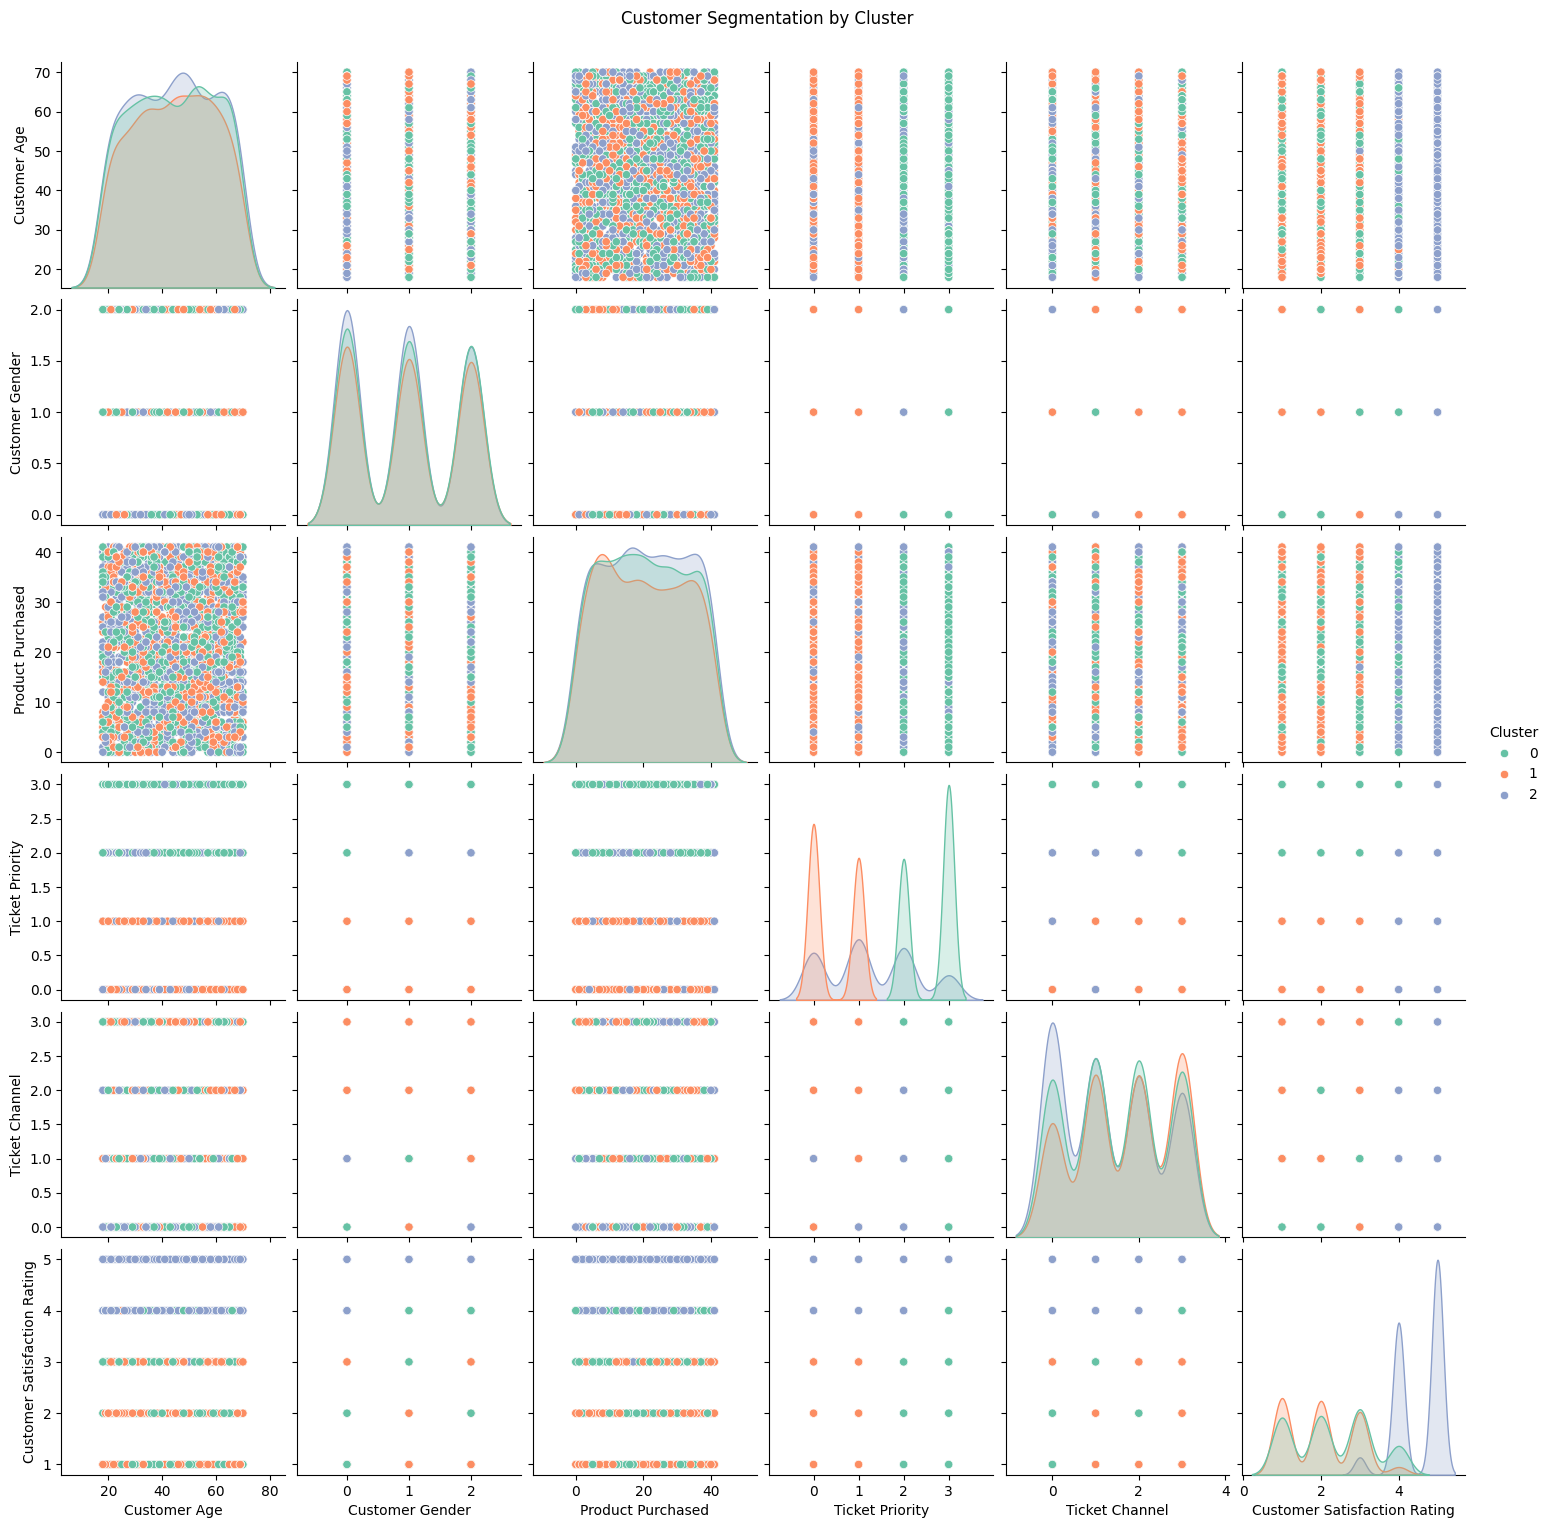

In [1]:
# STEP 1: تحميل المكتبات
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: تحميل البيانات (ارفع الملف أولًا على Colab)
df = pd.read_csv('customer_support_tickets.csv')

# STEP 3: اختيار الأعمدة المفيدة
data = df[['Customer Age', 'Customer Gender', 'Product Purchased',
           'Ticket Priority', 'Ticket Channel', 'Customer Satisfaction Rating']].dropna()

# STEP 4: تحويل النصوص لأرقام
label_enc = LabelEncoder()
for col in data.select_dtypes(include='object').columns:
    data[col] = label_enc.fit_transform(data[col])

# STEP 5: توحيد القيم (Standardization)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# STEP 6: تحديد عدد الكلاسترات باستخدام Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# STEP 7: رسم Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()

# STEP 8: تدريب نموذج KMeans بأفضل عدد (مثلاً 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# STEP 9: رسم النتائج
sns.pairplot(data, hue='Cluster', palette='Set2')
plt.suptitle('Customer Segmentation by Cluster', y=1.02)
plt.show()
